<a href="https://colab.research.google.com/github/Joshua-Abok/Udacity_Data_Analyst_Nanodegree/blob/Joshua-Abok-patch-1/investigate_a_dataset_tmdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Investigate a Dataset - The IMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will be analysing the tmdb dataset and getting to answer the questions such as the highest voted movies and also the highest revenue produced by those movies. 

The TMDb dataset contains information of about 
about 5,000 movies collected from The Movie Database.
The information include revenues, user ratings, budget, etc. 

>The questions to explore on this dataset for our report. 
1. Which title of the movies have the highest voting counts? 
2. What kinds of properties are associated with movies that have high revenues?




In [1]:
# Import libraries
from google.colab import drive 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import missingno

%matplotlib inline 

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id='wrangling'></a>
## Data Wrangling

>load in the data, 
>Cleaning the data for analysis



In [2]:
# Load your data and print out a few lines. 
tmdb_movie = pd.read_csv("/content/drive/MyDrive/Data/kaggle_data/tmdb_5000_movies.csv")
tmdb_credit = pd.read_csv("/content/drive/MyDrive/Data/kaggle_data/tmdb_5000_credits.csv")

In [3]:
tmdb_movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
tmdb_credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
#Perform operations to inspect data
tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
tmdb_movie.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [7]:
#looking for instances of missing or possibly errant data.
tmdb_movie.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [8]:
tmdb_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [9]:
#sum of the null values
tmdb_credit.isna().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

### Data Cleaning on the tmdb dataset

Now Performing cleaning steps on the data. Previously we have noticed a couple of missing values which might need filling. 
The steps we might take here are: 
1. Either fill in the mean average values 
2. Use mode on the null values

In [10]:
#first, we will need to merge the the two dataframes on the given title and id column

tmdb_merge = tmdb_movie.merge(tmdb_credit, left_on=['id', 'original_title'], right_on=['movie_id', 'title'])
tmdb_merge.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
tmdb_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4542 entries, 0 to 4541
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4542 non-null   int64  
 1   genres                4542 non-null   object 
 2   homepage              1631 non-null   object 
 3   id                    4542 non-null   int64  
 4   keywords              4542 non-null   object 
 5   original_language     4542 non-null   object 
 6   original_title        4542 non-null   object 
 7   overview              4539 non-null   object 
 8   popularity            4542 non-null   float64
 9   production_companies  4542 non-null   object 
 10  production_countries  4542 non-null   object 
 11  release_date          4541 non-null   object 
 12  revenue               4542 non-null   int64  
 13  runtime               4540 non-null   float64
 14  spoken_languages      4542 non-null   object 
 15  status               

Checking the homepage and tagline columns which have the highest number of missing values


In [12]:
tmdb_merge[['homepage', 'tagline']].sample(15)

,homepage,tagline
761,NaN,When someone you love dies... are they gone fo...
536,NaN,"If It Yells, If It Swings, It's Got To Be Monk..."
938,NaN,He frees hostages for a living. Now he's takin...
4098,NaN,Beyond Science. Beyond Sanity. Beyond Control.
82,http://www.dawnofapes.com/,One last chance for peace.
1101,NaN,Life is for living.
5,http://www.sonypictures.com/movies/spider-man3/,The battle within.
559,NaN,Catch her if you can.
3257,http://www.theextramanmovie.com/,"They're not gigolos, they're gentlemen."
3966,NaN,The hot-line suspense comedy


In [13]:
#Going ahead to drop these particular columns since we won't need them for now
tmdb_merge = tmdb_merge.drop(['homepage', 'tagline'], axis=1)

In [14]:
#checking the remaining data for other missing values
tmdb_merge.isna().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title_x                 0
vote_average            0
vote_count              0
movie_id                0
title_y                 0
cast                    0
crew                    0
dtype: int64

In [15]:
#dropping any other missing values

tmdb_merge = tmdb_merge.dropna()

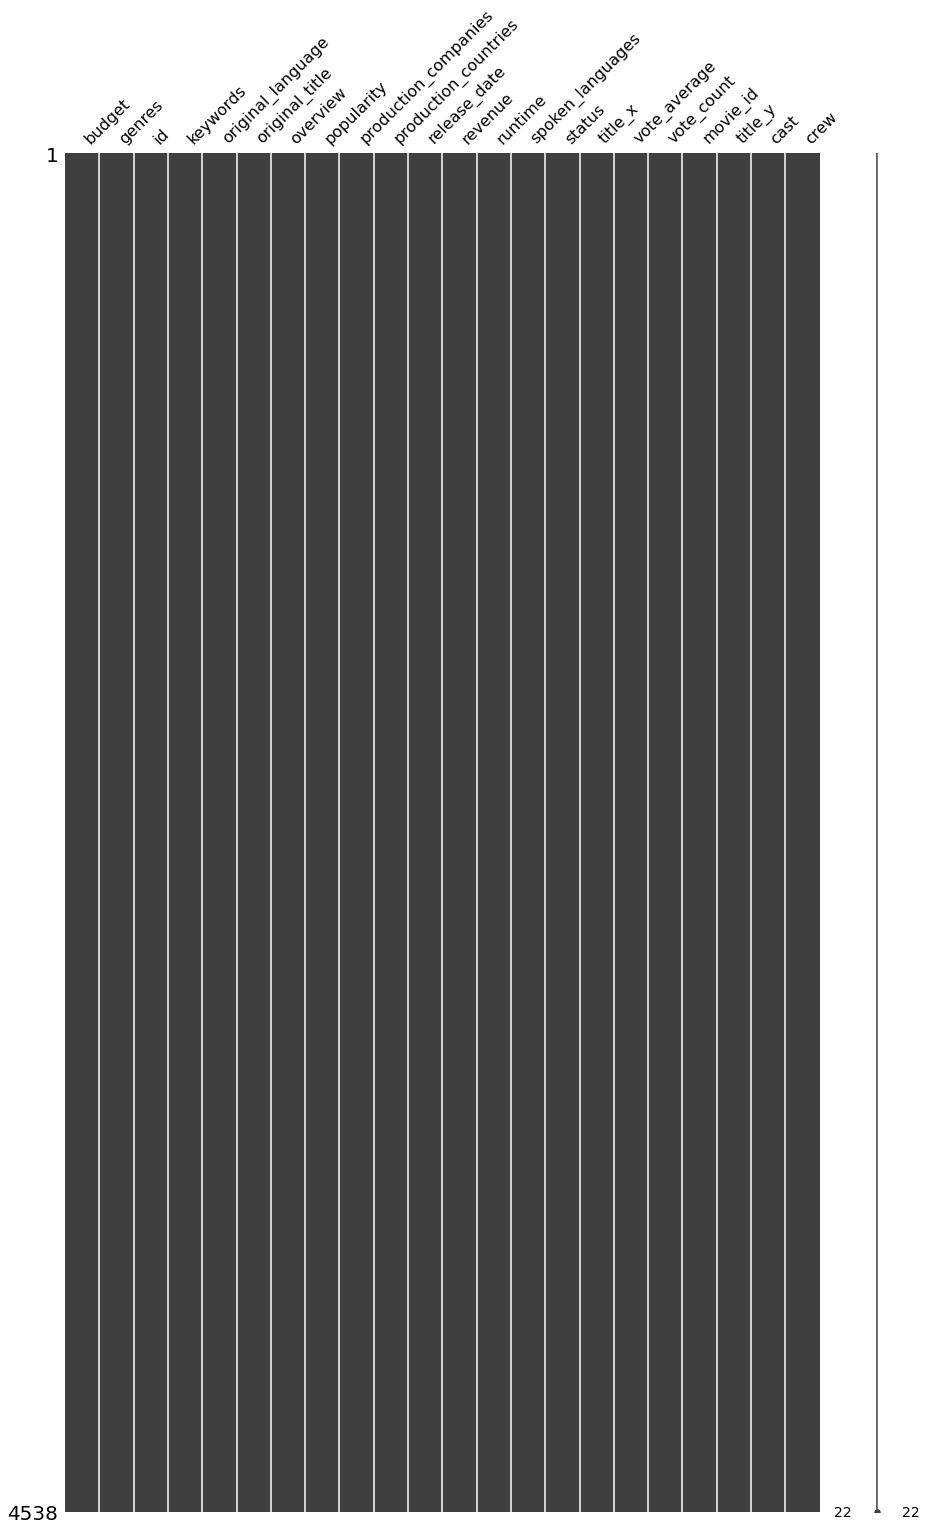

In [16]:
#the plot shows no missing values

missingno.matrix(tmdb_merge, figsize=(15, 25))

<a id='eda'></a>
## Exploratory Data Analysis

> Creating visualizations with the goal of addressing the research questions that we have posed in the introduction section. 

### Research Question 1 (Which title of the movies have the top voting?)

In [17]:
#checking our tmdb_merge's information
tmdb_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4538 entries, 0 to 4541
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4538 non-null   int64  
 1   genres                4538 non-null   object 
 2   id                    4538 non-null   int64  
 3   keywords              4538 non-null   object 
 4   original_language     4538 non-null   object 
 5   original_title        4538 non-null   object 
 6   overview              4538 non-null   object 
 7   popularity            4538 non-null   float64
 8   production_companies  4538 non-null   object 
 9   production_countries  4538 non-null   object 
 10  release_date          4538 non-null   object 
 11  revenue               4538 non-null   int64  
 12  runtime               4538 non-null   float64
 13  spoken_languages      4538 non-null   object 
 14  status                4538 non-null   object 
 15  title_x              

We confirm that the highest voted movies are not necessarily the best movies since we have some with only one voting of 10.

In [18]:
average_voting = pd.DataFrame(tmdb_merge.groupby('original_title')['vote_average', 'vote_count'].sum())

highest_voting = average_voting.sort_values(by='vote_average', ascending=False).head(10)
highest_voting


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vote_average,vote_count
original_title,,
Batman,13.1,2299
Out of the Blue,12.4,35
Stiff Upper Lips,10.0,1
Little Big Top,10.0,1
"Dancer, Texas Pop. 81",10.0,1
Me You and Five Bucks,10.0,2
Sardaarji,9.5,2
One Man's Hero,9.3,2
There Goes My Baby,8.5,2


Now we can go ahead and check the average_voting versus the vote counts and get our highest voted movie titles

In [19]:
top_10_voted = tmdb_merge.sort_values(by='vote_count', ascending=False)[:11]
top_10_voted = top_10_voted[['original_title', 'vote_count', 'vote_average']]

In [20]:
top_10_voted

,original_title,vote_count,vote_average
96,Inception,13752,8.1
65,The Dark Knight,12002,8.2
0,Avatar,11800,7.2
16,The Avengers,11776,7.4
777,Deadpool,10995,7.4
95,Interstellar,10867,8.1
284,Django Unchained,10099,7.8
94,Guardians of the Galaxy,9742,7.9
422,The Hunger Games,9455,6.9
126,Mad Max: Fury Road,9427,7.2


Plot a histogram on the highest voted movies

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

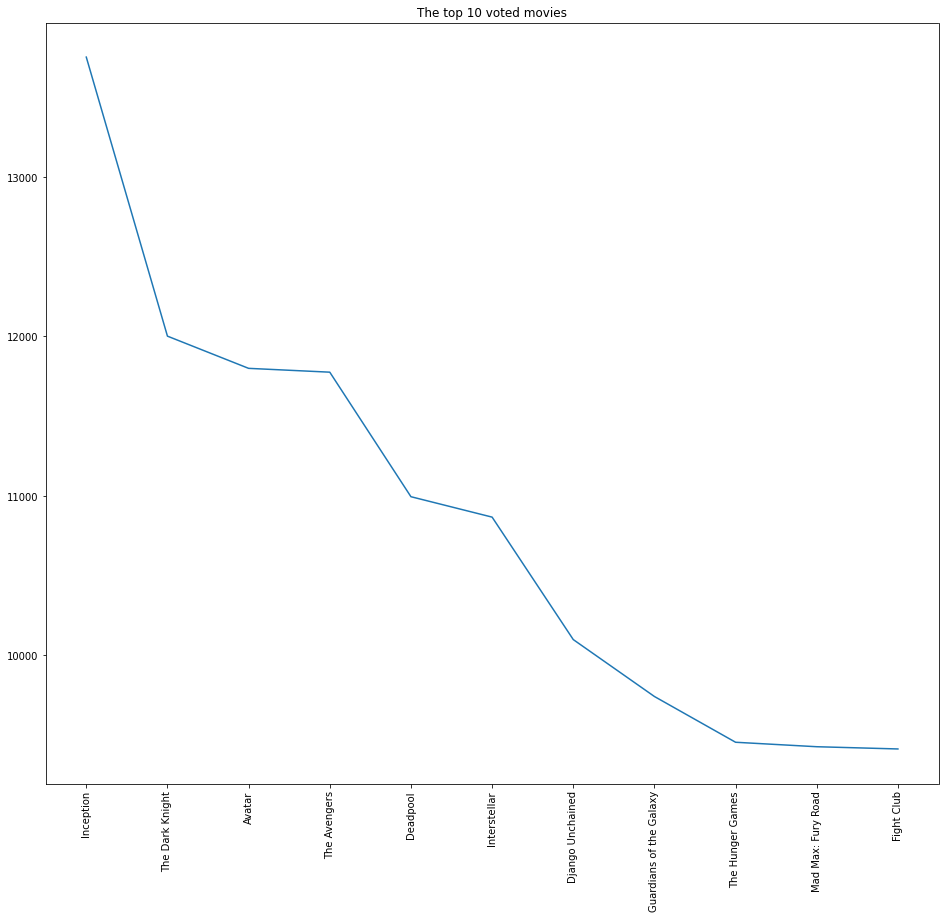

In [21]:
plt.figure(figsize=(16, 14))
plt.plot(top_10_voted['original_title'], top_10_voted['vote_count'])
plt.title('The top 10 voted movies')
plt.xticks(rotation='vertical')

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [22]:
highest_revenues = tmdb_merge.sort_values(by='revenue', ascending=False)[:11]


In [23]:
highest_revenue_title = highest_revenues[['original_title', 'revenue', 'budget', 'production_countries',  'production_companies', 'runtime', 'genres']]
highest_revenue_title

,original_title,revenue,budget,production_countries,production_companies,runtime,genres
0,Avatar,2787965087,237000000,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",162.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
25,Titanic,1845034188,200000000,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",194.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n..."
16,The Avengers,1519557910,220000000,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",143.0,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""..."
28,Jurassic World,1513528810,150000000,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",124.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
44,Furious 7,1506249360,190000000,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...","[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",137.0,"[{""id"": 28, ""name"": ""Action""}]"
7,Avengers: Age of Ultron,1405403694,280000000,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",141.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
123,Frozen,1274219009,150000000,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",102.0,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 12, ""..."
31,Iron Man 3,1215439994,200000000,"[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...","[{""name"": ""Marvel Studios"", ""id"": 420}]",130.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
539,Minions,1156730962,74000000,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",91.0,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""..."
26,Captain America: Civil War,1153304495,250000000,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Studio Babelsberg"", ""id"": 264}, {""n...",147.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""..."


In [24]:
highest_revenues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 52
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                11 non-null     int64  
 1   genres                11 non-null     object 
 2   id                    11 non-null     int64  
 3   keywords              11 non-null     object 
 4   original_language     11 non-null     object 
 5   original_title        11 non-null     object 
 6   overview              11 non-null     object 
 7   popularity            11 non-null     float64
 8   production_companies  11 non-null     object 
 9   production_countries  11 non-null     object 
 10  release_date          11 non-null     object 
 11  revenue               11 non-null     int64  
 12  runtime               11 non-null     float64
 13  spoken_languages      11 non-null     object 
 14  status                11 non-null     object 
 15  title_x               11 

In [25]:
from matplotlib.pyplot import figure

def bar_plot(title, col):
  figure(figsize=(16, 14))
  plt.title(title)
  plt.bar(highest_revenue_title.original_title, highest_revenue_title[col])
  plt.xticks(rotation='vertical', fontsize=14)
  

  return plt.draw()

It is clear that the top voted movies also appears to have the highest revenues

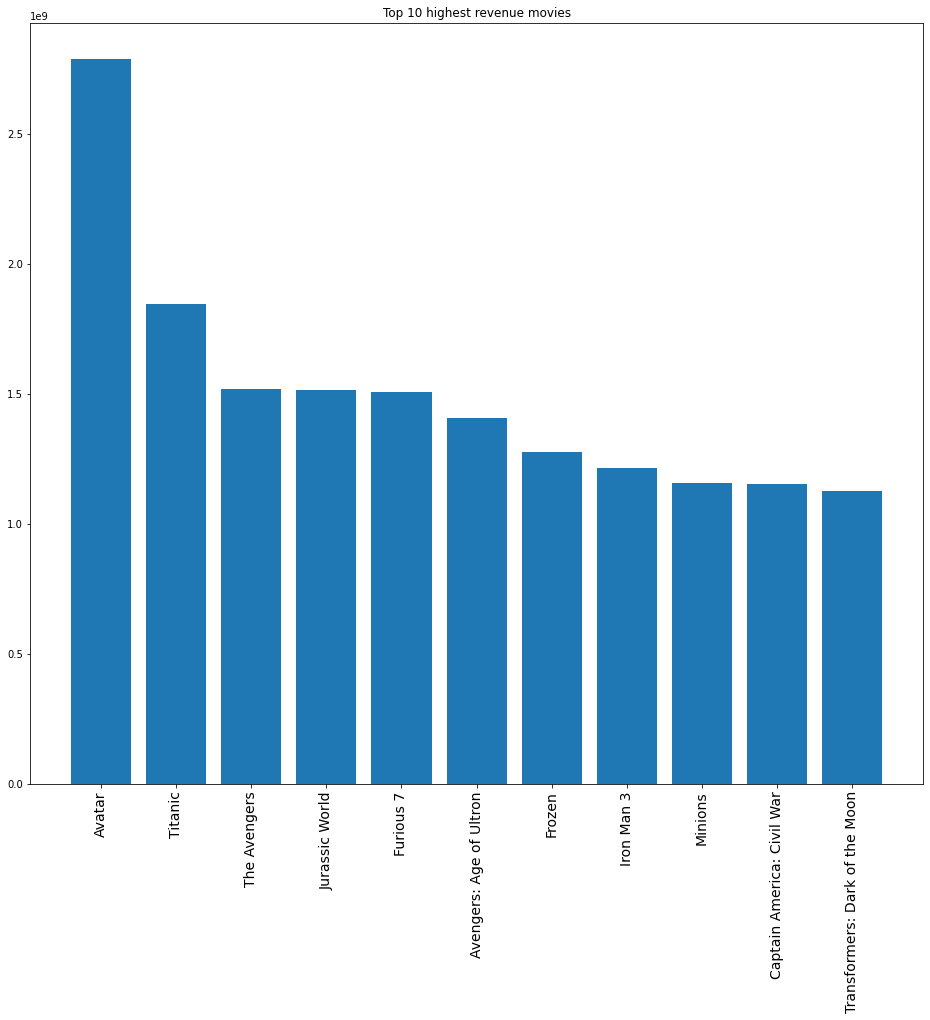

In [26]:
# top highest revenue movies tend to be the top voted ones. 

bar_plot("Top 10 highest revenue movies", "revenue" )

We can also deduce that the budget for the highest revenue movies tend to be slightly high. But we can't conclude just yet, if they get to have 
the highest budget

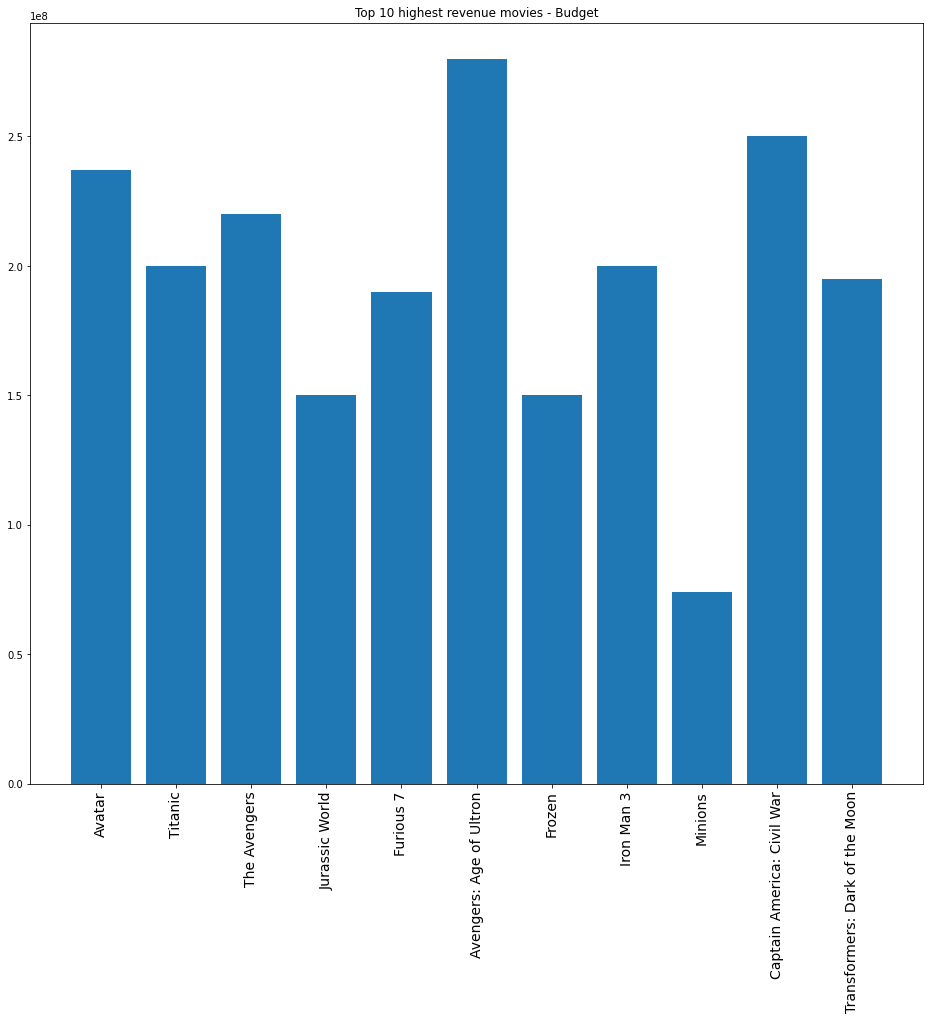

In [27]:

bar_plot("Top 10 highest revenue movies - Budget", "budget" )


The bar plot below gives us an insight into the runtime of the 10 highest revenue movies and it is clear that the top highest revenue movies just have average runtime


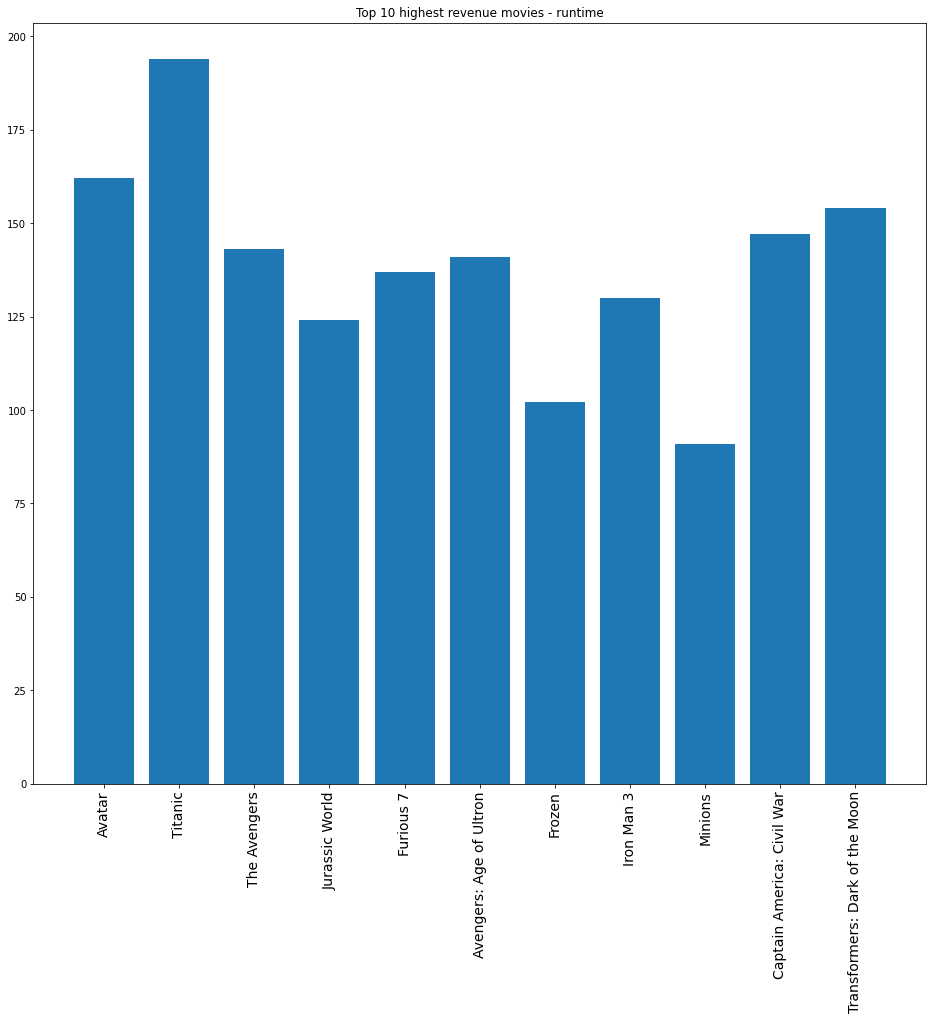

In [28]:
bar_plot("Top 10 highest revenue movies - runtime", "runtime" )


We can also deduce that the highest budgeted movies won't necessary make the cut for the top 10 highest revenue movies. For instance, in our case, we have Avengers and Captain america having the highest revenues

In [29]:
#comparing the data on the budget and runtime 

for movie in ['budget', 'runtime']:
    display(tmdb_merge[[f'{movie}', 'original_title', 'vote_count', 'vote_average']].sort_values(f'{movie}', ascending=False)[:11])
    

,budget,original_title,vote_count,vote_average
17,380000000,Pirates of the Caribbean: On Stranger Tides,4948,6.4
1,300000000,Pirates of the Caribbean: At World's End,4500,6.9
7,280000000,Avengers: Age of Ultron,6767,7.3
10,270000000,Superman Returns,1400,5.4
4,260000000,John Carter,2124,6.1
6,260000000,Tangled,3330,7.4
5,258000000,Spider-Man 3,3576,5.9
13,255000000,The Lone Ranger,2311,5.9
26,250000000,Captain America: Civil War,7241,7.1
22,250000000,The Hobbit: The Desolation of Smaug,4524,7.6


,runtime,original_title,vote_count,vote_average
2314,338.0,Carlos,50,6.7
2552,276.0,The Company,12,7.0
1878,254.0,Gettysburg,90,6.6
1109,248.0,Cleopatra,146,6.7
2304,242.0,Hamlet,117,7.3
3364,240.0,Emma,38,7.6
3640,238.0,Gone with the Wind,970,7.7
1631,229.0,Once Upon a Time in America,1069,8.2
4258,225.0,Woodstock,66,7.1
1093,219.0,Heaven's Gate,55,6.4


There tend to be a high budget for what turns out to be the highest revenue movies


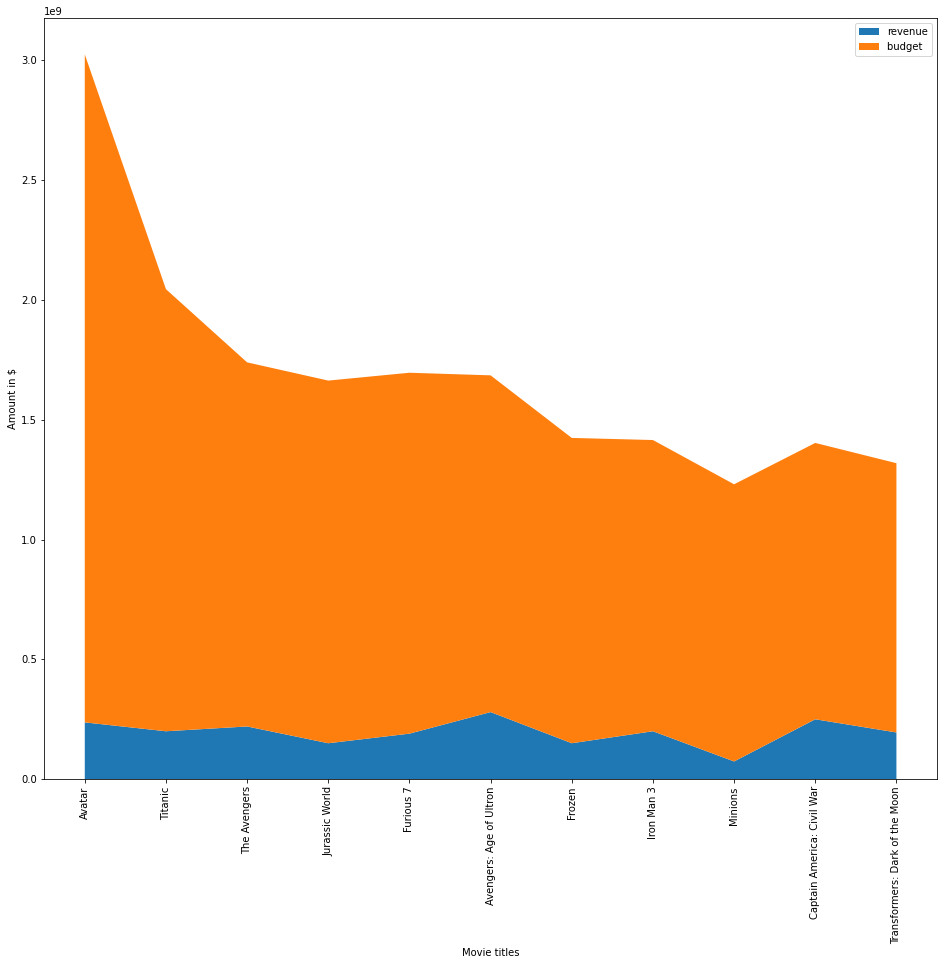

In [30]:
#plot of revenue and budget on the movies
labels = [ "revenue", "budget "]

fig, ax = plt.subplots(figsize=(16, 14))
ax.stackplot(highest_revenue_title['original_title'],  highest_revenue_title['budget'], highest_revenue_title['revenue'], labels=labels)
ax.set_xlabel("Movie titles")
ax.set_ylabel("Amount in $")
plt.xticks(rotation='vertical')
legend = ax.legend(loc='best')
plt.show()


<a id='conclusions'></a>
## Conclusions

>Findings

As seen the top highest revenue movies tend to be the top voted ones. 
We can also deduce that the budget for the highest revenue movies tend to be slightly high. But not quite the highest of all the movies. We have been able to check the top 10 highest budget movies and we kind of get somewhat different movies on this list.

> Limitations to the exploration

The Genre, Production Company and Production Country columns are all lists nested in strings and maybe in future we would consider a way to have them in proper lists for further exploration.



In [33]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/investigate-a-dataset-template.ipynb.zip (Unzipped Files)/investigate-a-dataset-tmdb.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/investigate-a-dataset-template.ipynb.zip (Unzipped Files)/investigate-a-dataset-tmdb.ipynb to html
[NbConvertApp] Writing 628993 bytes to /content/drive/MyDrive/Colab Notebooks/investigate-a-dataset-template.ipynb.zip (Unzipped Files)/investigate-a-dataset-tmdb.html
